In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))

import json
import time
from os import path

import matplotlib.patches as patches

import pandas as pd


In [2]:
data_filename = "../CAMHDA301-20160101T000000Z.json"

with open(data_filename) as data_file:    
    j = json.load(data_file)


In [3]:
frame_num = [ f["frameNum"] for f in j["stats"]]
similarities = [ f["similarity"] for f in j["stats"] ]

stats = pd.DataFrame(similarities, index=frame_num).sort_index()

print(stats)

      center  duration_us  flowScale  fromFrame  imgScale similarity  toFrame  \
0        NaN      1109389        NaN        NaN       NaN        NaN      NaN   
10       NaN      1147845        NaN        NaN       NaN        NaN      NaN   
20       NaN      1046167        NaN        NaN       NaN        NaN      NaN   
30       NaN       954498        NaN        NaN       NaN        NaN      NaN   
40       NaN       980457        NaN        NaN       NaN        NaN      NaN   
50       NaN       992173        NaN        NaN       NaN        NaN      NaN   
60       NaN      1029088        NaN        NaN       NaN        NaN      NaN   
70       NaN       983470        NaN        NaN       NaN        NaN      NaN   
80       NaN       854369        NaN        NaN       NaN        NaN      NaN   
90       NaN       964486        NaN        NaN       NaN        NaN      NaN   
100      NaN       854234        NaN        NaN       NaN        NaN      NaN   
110      NaN       758078   

In [4]:
valid = stats[ stats.valid == True ]

# Break the similarity structure out into columns
#similarity = pd.DataFrame.from_records( valid.similarity, valid.index )

## Convert center columns to center_x, center_y
valid = pd.concat( [valid.center.apply( pd.Series ), valid.drop('center', axis=1)], axis=1) \
            .rename( columns={ 0: 'center_x', 1: 'center_y '} )

valid = pd.concat( [valid.similarity.apply( pd.Series ), valid.drop('similarity', axis=1)], axis=1) \
            .rename( columns={ 0: 'scale', 1: 'theta', 2: 'trans_x', 3: 'trans_y'} )

valid['trans'] = valid.trans_x**2 + valid.trans_y**2

print(valid)


          scale  theta    trans_x     trans_y  center_x  center_y   \
570    0.731437    0.0  12.948994  125.998144    -960.0     -540.0   
580    0.998144    0.0  -0.259867    0.037775    -960.0     -540.0   
590    0.999561    0.0  -0.008649   -0.003345    -960.0     -540.0   
600    0.999436    0.0  -0.027887   -0.050824    -960.0     -540.0   
610    0.999774    0.0   0.002541   -0.031326    -960.0     -540.0   
620    0.999830    0.0   0.002202   -0.020548    -960.0     -540.0   
630    0.999853    0.0  -0.005029   -0.018303    -960.0     -540.0   
640    1.000020    0.0  -0.002134    0.006261    -960.0     -540.0   
650    1.000037    0.0   0.009089    0.005455    -960.0     -540.0   
660    0.999859    0.0   0.001965    0.004695    -960.0     -540.0   
670    1.000009    0.0   0.001418    0.022581    -960.0     -540.0   
680    1.000041    0.0  -0.002835    0.005910    -960.0     -540.0   
690    0.999940    0.0  -0.000410   -0.006389    -960.0     -540.0   
700    0.999991    0

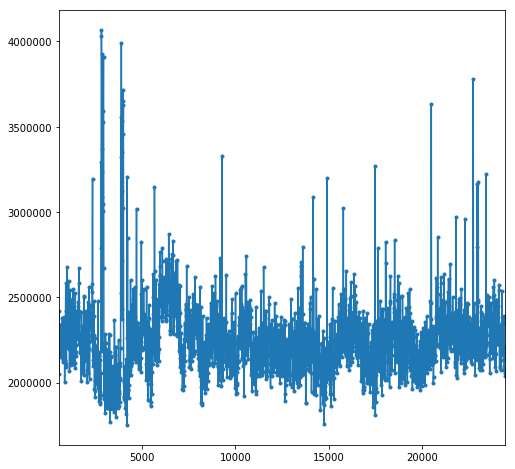

In [5]:

valid.duration_us.plot(style='.-')


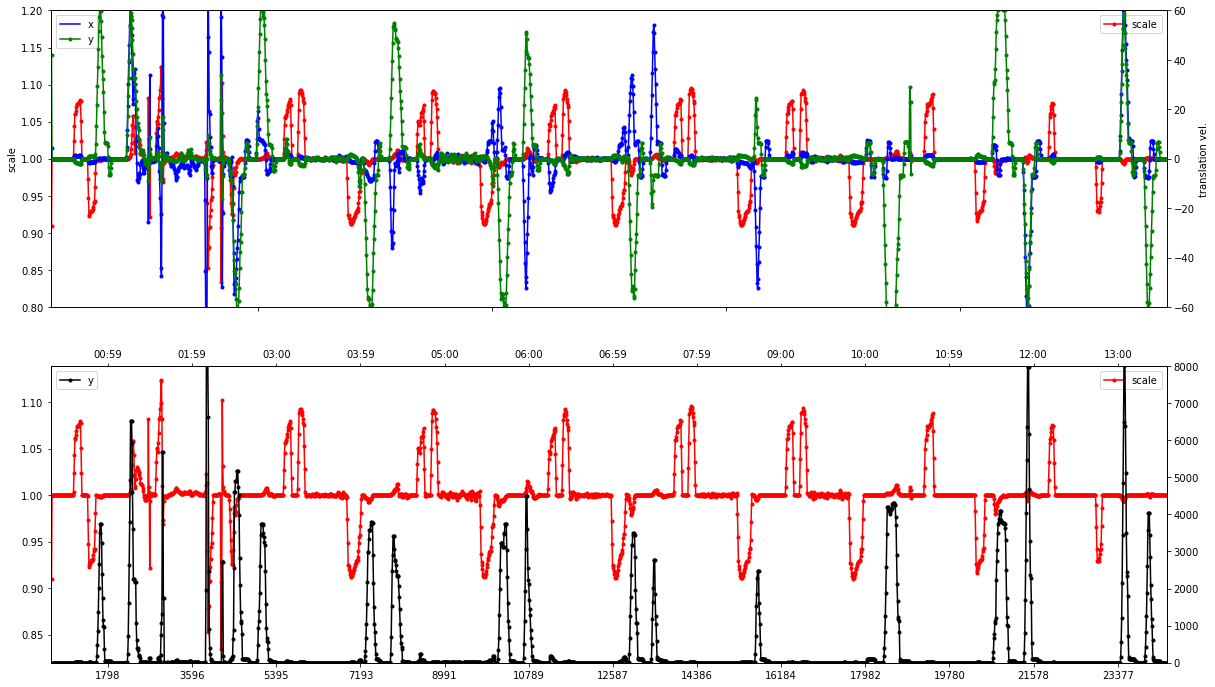

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

scale_lim = [0.8,1.2]
trans_lim = [-60,60]
total_trans_lim=[-5,8000]

ticks_secs = 60
ticks = np.arange(0.0, max(valid.index), 29.97*ticks_secs)
#axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

raxes = axes[0].twinx()
valid.scale.rolling(window=3,center=False).mean().plot(style='r.-', ax=axes[0], ylim=scale_lim,label='scale', legend=True)
axes[0].set_ylabel('scale')
valid.trans_x.rolling(window=3,center=False).mean().plot(style='b.-', ax=raxes, ylim=trans_lim, label='x', legend=True)
raxes.set_ylabel('translation vel.')
valid.trans_y.rolling(window=3,center=False).mean().plot(style='g.-', ax=raxes, ylim=trans_lim, label='y', legend=True)

raxes = axes[1].twinx()
valid.scale.rolling(window=3,center=False).mean().plot(style='r.-', ax=axes[1], label='scale', legend=True)
valid.trans.rolling(window=5,center=False).median().plot(style='k.-', ax=raxes, ylim=total_trans_lim, label='y', legend=True)


timeaxes = axes[1].twiny() 
timeticks = axes[1].get_xticks()

def tick_function(f):
    V = f / 29.97
    return [time.strftime("%M:%S", time.gmtime(z))  for z in V]

timeaxes.set_xticks(timeticks)
timeaxes.set_xbound(axes[1].get_xbound())
timeaxes.set_xticklabels(tick_function(timeticks));


In [30]:
stable = valid.loc[lambda df: df.trans < 500].loc[ lambda df: (df.scale-1).abs() < 0.01 ]

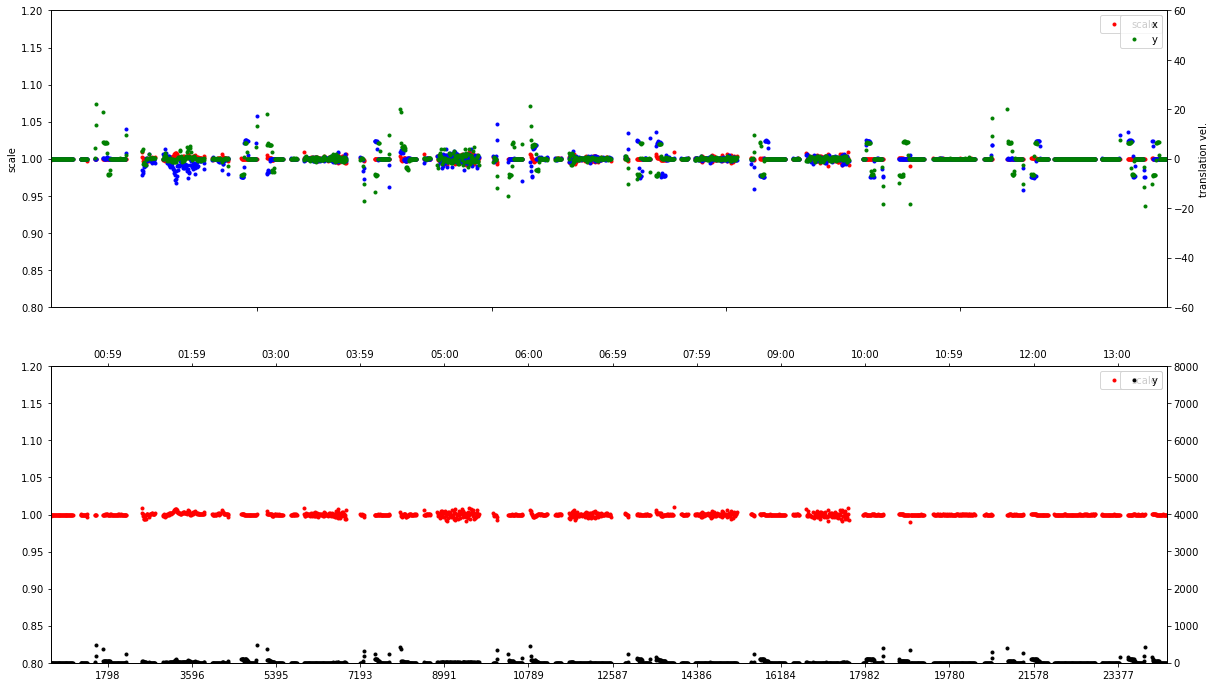

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

ticks_secs = 60
ticks = np.arange(0.0, max(valid.index), 29.97*ticks_secs)
#axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

raxes = axes[0].twinx()
stable.scale.plot(style='r.', ax=axes[0], label='scale', ylim=scale_lim, legend=True)
axes[0].set_ylabel('scale')
stable.trans_x.plot(style='b.', ax=raxes,  ylim=trans_lim, label='x', legend=True)
raxes.set_ylabel('translation vel.')
stable.trans_y.plot(style='g.', ax=raxes,  ylim=trans_lim, label='y', legend=True)

raxes = axes[1].twinx()
stable.scale.plot(style='r.', ax=axes[1], ylim=scale_lim, label='scale', legend=True)
stable.trans.plot(style='k.', ax=raxes, label='y', ylim=total_trans_lim,  legend=True)


timeaxes = axes[1].twiny() 
timeticks = axes[1].get_xticks()

def tick_function(f):
    V = f / 29.97
    return [time.strftime("%M:%S", time.gmtime(z))  for z in V]

timeaxes.set_xticks(timeticks)
timeaxes.set_xbound(axes[1].get_xbound())
timeaxes.set_xticklabels(tick_function(timeticks));



In [94]:
def contiguous_region(series, delta = 10):
    series['dt'] = series.index.to_series().diff(1).fillna(0)                         
    series['block'] = (series.index.to_series().diff(1) > (delta*1.01) ).cumsum()
    #print(series)
    
    blocks = series.groupby('block')
    #print(blocks.groups)
    
    out = []
    for name,group in blocks:
        out += [ [ np.asscalar(group.index.min()), np.asscalar(group.index.max()) ] ]
    
    return out
    
regions = contiguous_region( stable )

regions_filename = path.splitext(data_filename)[0] + '_regions.json'

json_out = { 'movie': j['movie'], 'regions': regions }

with open( regions_filename, 'w' ) as outfile:
    json.dump( json_out, outfile)




          scale  theta   trans_x   trans_y  center_x  center_y   duration_us  \
580    0.998144    0.0 -0.259867  0.037775    -960.0     -540.0      2422214   
590    0.999561    0.0 -0.008649 -0.003345    -960.0     -540.0      2049504   
600    0.999436    0.0 -0.027887 -0.050824    -960.0     -540.0      2160439   
610    0.999774    0.0  0.002541 -0.031326    -960.0     -540.0      2175404   
620    0.999830    0.0  0.002202 -0.020548    -960.0     -540.0      2340295   
630    0.999853    0.0 -0.005029 -0.018303    -960.0     -540.0      2321531   
640    1.000020    0.0 -0.002134  0.006261    -960.0     -540.0      2241253   
650    1.000037    0.0  0.009089  0.005455    -960.0     -540.0      2161369   
660    0.999859    0.0  0.001965  0.004695    -960.0     -540.0      2288693   
670    1.000009    0.0  0.001418  0.022581    -960.0     -540.0      2202723   
680    1.000041    0.0 -0.002835  0.005910    -960.0     -540.0      2149251   
690    0.999940    0.0 -0.000410 -0.0063

In [105]:
r = regions[10]
print(r)

region = stable.iloc[lambda df: df.index >= r[0]].iloc[lambda df: df.index <= r[1]]
#print(section)

[5200, 5540]


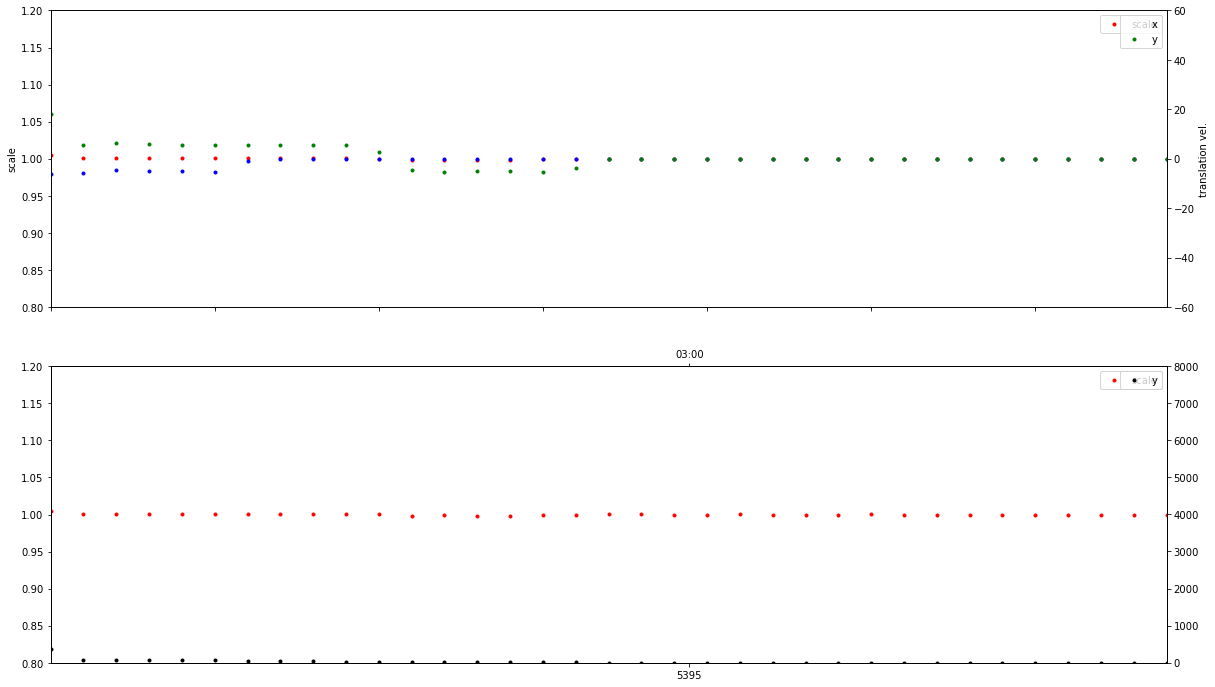

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

ticks_secs = 60
ticks = np.arange(0.0, max(valid.index), 29.97*ticks_secs)
#axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

raxes = axes[0].twinx()
region.scale.plot(style='r.', ax=axes[0], label='scale', ylim=scale_lim, legend=True)
axes[0].set_ylabel('scale')
region.trans_x.plot(style='b.', ax=raxes,  ylim=trans_lim, label='x', legend=True)
raxes.set_ylabel('translation vel.')
region.trans_y.plot(style='g.', ax=raxes,  ylim=trans_lim, label='y', legend=True)

raxes = axes[1].twinx()
region.scale.plot(style='r.', ax=axes[1], ylim=scale_lim, label='scale', legend=True)
region.trans.plot(style='k.', ax=raxes, label='y', ylim=total_trans_lim,  legend=True)


timeaxes = axes[1].twiny() 
timeticks = axes[1].get_xticks()

def tick_function(f):
    V = f / 29.97
    return [time.strftime("%M:%S", time.gmtime(z))  for z in V]

timeaxes.set_xticks(timeticks)
timeaxes.set_xbound(axes[1].get_xbound())
timeaxes.set_xticklabels(tick_function(timeticks));